แสดงภาพชุดข้อมูล


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../../data/birds.csv')
birds.head()

Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       79.0       2050.0       4050.0   
3                 LC       57.3       64.0       1066.0       1567.0   
4                 LC       64.0       81.0       1930.0       3310.0   

   MinWingspan  MaxWingspan  
0         76.0         94.0  
1         85.0         93.0  
2        135.0        165.0  
3        113.0        116.0  
4        130.0        165.0

แสดงฮิสโตแกรมของข้อมูล MaxBodyMass


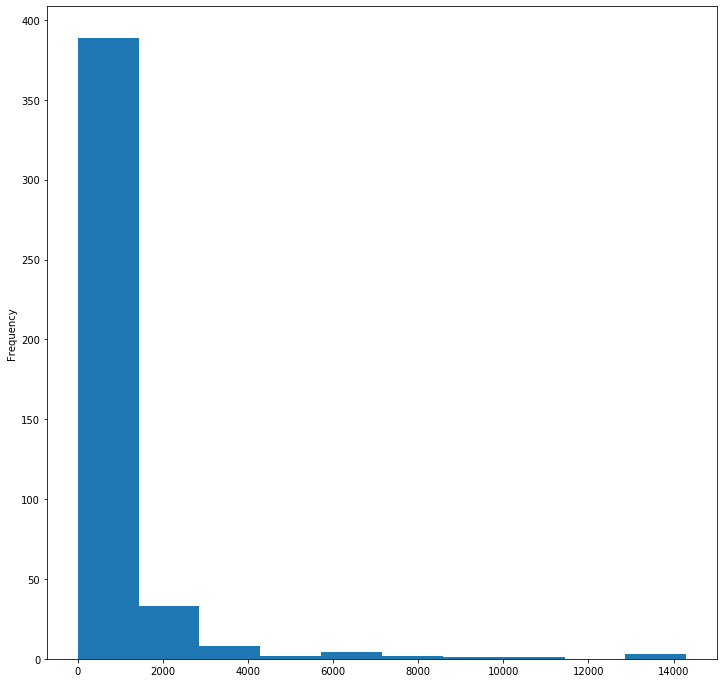

In [4]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 10,figsize = (12,12))
plt.show()

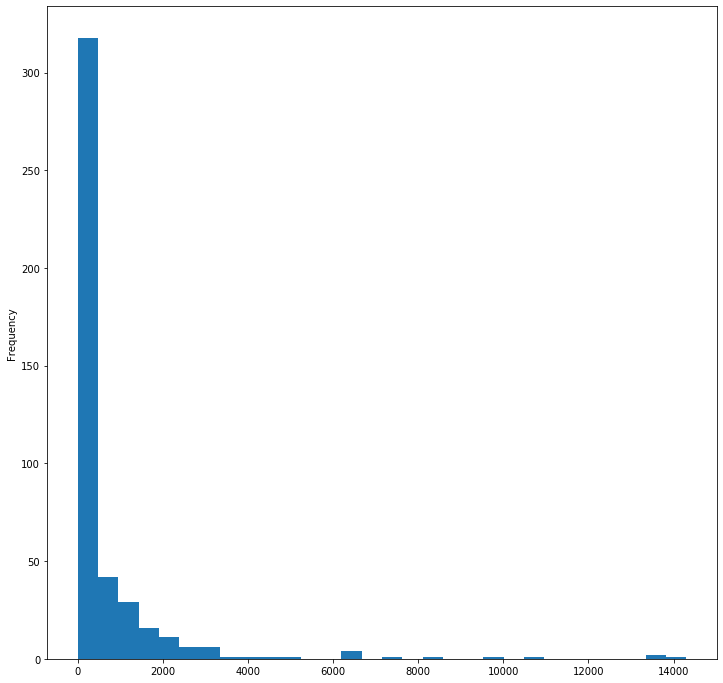

In [5]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 30,figsize = (12,12))
plt.show()

กรองข้อมูลและสร้างฮิสโตแกรมใหม่


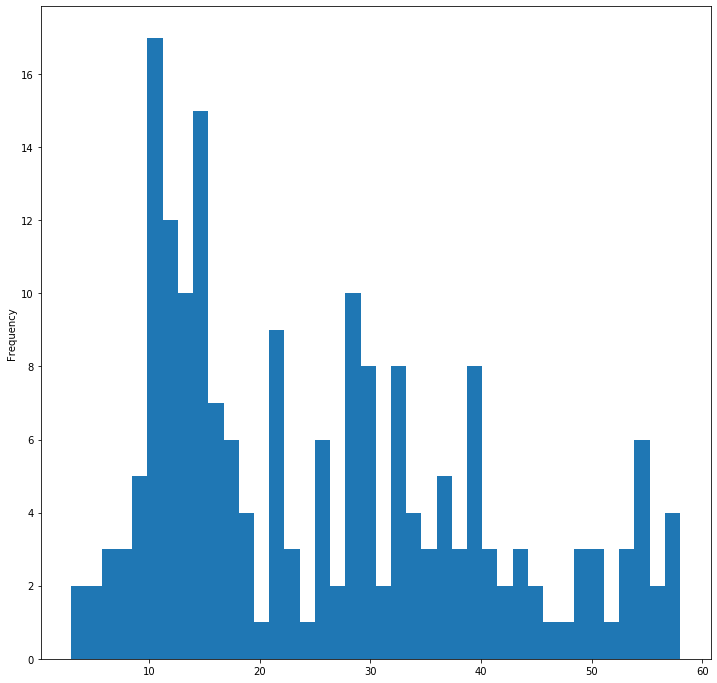

In [6]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()        


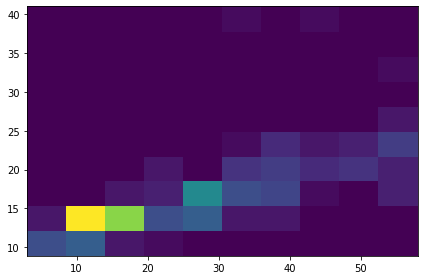

In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

การทำงานกับชุดข้อมูลที่กรองแล้ว สร้างฮิสโตแกรมแบบมีป้ายกำกับและซ้อนทับโดยวาง ConservationStatus ซ้อนกับ MaxBodyMass


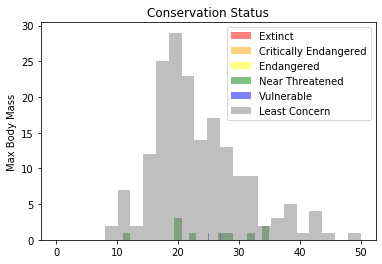

In [8]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Body Mass')
plt.legend();

การทำงานกับ Seaborn สร้างกราฟที่ราบรื่นเกี่ยวกับ MinWingspan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


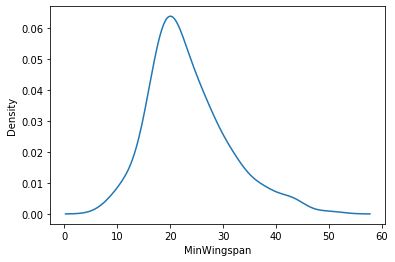

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

ลองใช้ kdeplot เกี่ยวกับ MaxBodyMass


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


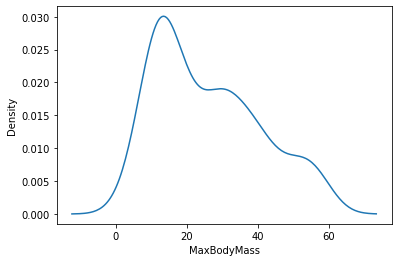

In [11]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

ทดลองกับพารามิเตอร์การทำให้พล็อตเรียบ


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


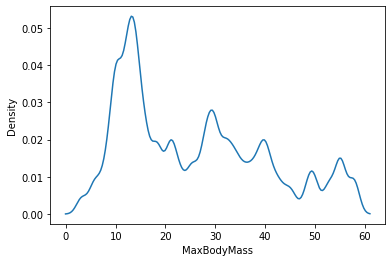

In [12]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

สร้างกราฟ KDE แบบสองมิติเปรียบเทียบ MinLength และ MaxLength โดยใช้ hue แสดง ConservationStatus


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


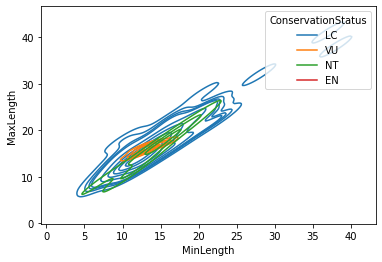

In [13]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาดั้งเดิมควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ แนะนำให้ใช้บริการแปลภาษามนุษย์มืออาชีพ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
